# 104人力銀行網站爬蟲練習
## 從104人力銀行網站爬取求職公司資訊。

In [1]:
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

### 首先進入104人力銀行網站：https://www.104.com.tw/cust/list/index/
### 在"地區"及"產業"下拉式選單中，選擇你希望的選項，然後按下"找公司"按鈕。

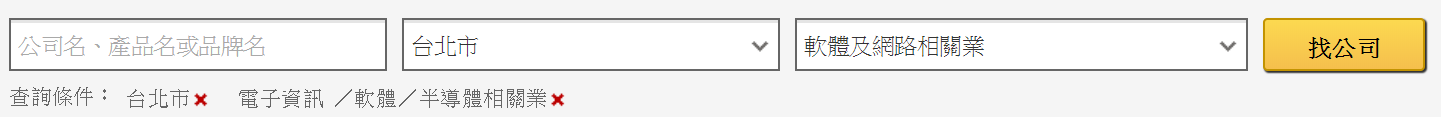

### 開啟新網頁後，觀察新的網址內容，把網址複製下來。

In [2]:
job_104_url = "https://www.104.com.tw/cust/list/index/?page=1&order=1&mode=s&jobsource=checkc&area=6001001000&indcat=1001002000"

### 開始爬取搜尋結果

In [3]:
import re

browser = webdriver.Chrome("../chromedriver_win32/chromedriver.exe")
browser.get(job_104_url)  # 打開瀏覽器並連到網頁
time.sleep(2)  # delay一段時間等待網頁更新完成

while True:
    time.sleep(3)  # delay一段時間等待網頁更新完成
    html = browser.page_source
    soup = BeautifulSoup(html, 'lxml')
    company_list = soup.find("div", attrs={'id':"company-result"}).find_all("article", attrs={'class':"items"})
    
    #
    # 擷取公司名稱及簡介內容
    #
    for company in company_list:
        # 因為內容太多，我們把爬取到的結果，寫入"company_list.txt"檔案中，稍後再來檢視
        company_name = company.a.string
        f = open("company_list.txt", "a+", encoding='utf-8')
        f.write( company_name + "\n" )  # 寫入公司名稱
        
        company_desc = company.find("p", attrs={'class':"desc"})
        f.write( company_desc.string + "\n" )  # 寫入公司簡介
        f.write( "--------------------------------------------------------------------------------" + "\n" )
        f.close()

    '''
    
    接下來請學員練習，定位到「下一頁」按鈕。(可以利用find_element_by_link_text("xxx")的函式)
    如果還有下一頁，利用Selenium模擬click「下一頁」按鈕的動作。(定位到物件後，利用其click()屬性)
    若沒有下一頁了，離開爬取的流程
    
    Your code here
    
    '''
    
    element_next = browser.find_element_by_link_text("下一頁")
    if "disabled" in element_next.get_attribute("class").split(" "):
        print("==========沒有下一頁了==========")
        break
    else:
        pattern = re.compile("page=(\d+)")
        match = pattern.search(browser.current_url)
        if match:
            print("爬取第{}頁...".format(match.group(1)))
        element_next.click()

爬取第1頁...
爬取第2頁...
爬取第3頁...
爬取第4頁...
爬取第5頁...
爬取第6頁...
==========沒有下一頁了==========


In [4]:
browser.quit()